# Titanic EDA Notebook
Author: Chris Endemann (endemann@wisc.edu)

### Data & Problem Intro
The Titanic dataset is a well-known dataset that contains information about the passengers of the Titanic ship.
It includes variables such as age, gender, class, fare, and whether each passenger survived.

The problem we are exploring is binary classification: predicting whether a passenger survived based on their features.
The goal of this EDA is to uncover insights that can guide our modeling decisions, such as identifying important
features, handling missing data, and addressing bias in the dataset (e.g., imbalances in survival rate by gender or class).


## Step 0: Looking Up Each Feature
Before diving into the analysis, it's important to understand what each feature in the dataset represents. This ensures we're interpreting the data correctly and allows us to make informed decisions during the analysis.

### Titanic Dataset Features:
- **survived**: Whether the passenger survived (0 = No, 1 = Yes).
- **pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- **sex**: Gender of the passenger.
- **age**: Age of the passenger in years. Some values are missing.
- **sibsp**: Number of siblings/spouses aboard the Titanic.
- **parch**: Number of parents/children aboard the Titanic.
- **fare**: Passenger fare.
- **embarked**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- **class**: Duplicate of 'pclass' (used for plotting by Seaborn).
- **who**: Describes whether the passenger is a man, woman, or child.
- **adult_male**: Indicates whether the passenger is an adult male (True/False).
- **deck**: The deck the passenger was on (missing for many passengers).
- **embark_town**: The name of the town where the passenger boarded.
- **alive**: Indicator of whether the passenger survived (Yes/No, derived from 'survived').
- **alone**: Indicates whether the passenger was traveling alone (True/False).


## Step 1: Visualizing data in its rawest form
Let's take a look at a small sample of the dataset to understand the raw data we're working with. This gives us a chance to spot obvious issues or patterns.


### Import libraries and load dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Show a small random sample of the data
print("Sample of 10 passengers:")
df.sample(30)


Sample of 10 passengers:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
296,0,3,male,23.5,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
146,1,3,male,27.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,yes,True
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
670,1,2,female,40.0,1,1,39.0000,S,Second,woman,False,NaN,Southampton,yes,False
628,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,NaN,Southampton,no,True
782,0,1,male,29.0,0,0,30.0000,S,First,man,True,D,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
453,1,1,male,49.0,1,0,89.1042,C,First,man,True,C,Cherbourg,yes,False


### Insights:
- We see various features such as age, sex, class, fare, and whether the passenger survived.
- This helps us get a quick overview of what kind of data we're working with, including potential issues like missing values.
- Appears we have some redundant columns.
- Some NaNs clearly visible in deck and age.

#### Remove redundant columns
It looks like alive and survived are identical. Same for embarked and emback_town. Let's run a check to see if these columns are truly identical and remove them, if so.

In [ ]:
# Check if the two columns are identical
are_identical = df['survived'].equals(df['alive'].apply(lambda x: 1 if x == 'yes' else 0))

# Print the result
print(f"Are 'survived' and 'alive' identical? {are_identical}")

Are 'survived' and 'alive' identical? True


In [ ]:
# Check unique values in both columns
print("Unique values in 'embarked':", df['embarked'].unique())
print("Unique values in 'embark_town':", df['embark_town'].unique())

# Map 'embarked' codes to 'embark_town' names
embarked_mapping = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

# Apply the mapping to the 'embarked' column
df['embarked_mapped'] = df['embarked'].map(embarked_mapping)

# Check if the mapped 'embarked' column is identical to 'embark_town'
are_identical = df['embarked_mapped'].equals(df['embark_town'])

# Print the result
print(f"Are 'embarked' and 'embark_town' identical? {are_identical}")


Unique values in 'embarked': ['S' 'C' 'Q' nan]
Unique values in 'embark_town': ['Southampton' 'Cherbourg' 'Queenstown' nan]
Are 'embarked' and 'embark_town' identical? True


In [ ]:
df.drop('alive',axis=1,inplace=True)
df.drop('embark_town',axis=1,inplace=True)
df.drop('embarked_mapped',axis=1,inplace=True)
df.drop('class',axis=1,inplace=True) #explicitly equiv. from documentation

## Step 2: Check data types


In [ ]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
who,object
adult_male,bool


## Step 3: Basic Statistics
Now we'll summarize the numerical and categorical columns to better understand the central tendencies, variability, and potential missing data.

When exploring numerical data:
- **Mean vs Median**: Compare the mean and median. If the mean is much higher or lower than the median, this suggests skewness in the data, possibly due to outliers.
- **Min and Max**: Look at the minimum and maximum values to detect extreme outliers or potential data entry errors.
- **Standard deviation**: A high standard deviation indicates that the data points are spread out over a wide range of values, while a low standard deviation suggests that data points are clustered around the mean.


When exploring **categorical data**:
- **Unique counts**: Check the number of unique categories. For example, the 'sex' column has two unique categories ('male' and 'female'), while 'pclass' has three.
- **Mode**: The mode (most frequent category) helps us understand which category dominates the dataset. For example, if most passengers are male or most belong to a particular class, this would inform our analysis.
- **Frequency distribution**: Look at the frequency of each category to identify potential imbalances. For example, are there more passengers from a particular class or embarkation point? Imbalanced categories can bias the model if not handled properly.
- **Missing or rare categories**: If a category has very few occurrences, this might suggest noise or anomalies in the data.

In [ ]:
# Summarize the numerical and categorical columns
print("\nBasic statistics for numerical columns:")
df.describe(include='all') # include='all' ensures both numeric and binary features are described



Basic statistics for numerical columns:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,203,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,7,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,man,True,C,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,537,537,59,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


### Insights:
- **Age**: The mean age is around 30, but with missing values and some extreme values (min = 0.42, max = 80). The mean and median are close, suggesting a fairly symmetric distribution for most passengers.
- **Fare**: The fare has a wide range, from 0 to 512. This large range and the difference between mean and median (mean > median) suggest the presence of outliers, with some passengers paying much higher fares.
- **Parch and SibSp**: Most passengers had few or no relatives onboard, with a median of 0 for both columns.
- **Pclass**: Most passengers are in 3rd class (mode: 3).



The df.describe(include='object') part of the code is used to generate summary statistics specifically for categorical (or object) columns in a DataFrame.

In [ ]:
print("\nBasic statistics for categorical columns:")
df.describe(include='object')



Basic statistics for categorical columns:


,sex,embarked,who
count,891,889,891
unique,2,3,3
top,male,S,man
freq,577,644,537


### Insights:
- A significant portion of passengers did not survive (survival rate is less than 50%).
- There are more males than females in this data, with adult males being the most common (vs boys)
- Southampton (S) is the most common embarkation point (out of three options)



While this summary provides useful information, it does not reveal the distribution of all categories, especially the rare categories. For instance, it only shows the most frequent category (the mode) and its frequency, but it doesn't show how the other categories are distributed, especially if there are categories with very few occurrences.

## Step 2.1: Identifying Rare Categories
To detect rare categories in the dataset, we will examine the frequency distribution of each categorical column. This will help us understand if there are categories with very few occurrences, which could either be noise or anomalies.

Rare categories are important to identify because they can introduce bias or affect model performance if not handled properly.


In [ ]:
# Frequency distribution for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for sex:
sex
male      577
female    314
Name: count, dtype: int64


Value counts for embarked:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Value counts for who:
who
man      537
woman    271
child     83
Name: count, dtype: int64




### Insights:
- **Sex**: No rare categories, with a fairly even distribution between males and females.
- **Pclass**: Most passengers are in 3rd class, but no rare categories.
- **Embarked**: The 'C' and 'Q' embarkation points are far less common than 'S' (Southampton).

## Step 3: Counting Missing Values (NaNs)
To get a better understanding of where data is missing, we'll count the number of NaN values in each column.
This is important for understanding which features will need imputation or may need to be excluded from analysis.


In [ ]:
# Count the number of NaN values in each column
print("Number of NaNs per column:")
print(df.isna().sum())


Number of NaNs per column:
survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          688
alone           0
dtype: int64


## Step 3.1: Visualizing Missing Data
Visualizing missing data helps us understand how much data is missing and where. This informs how we should handle missing values during preprocessing.

The 'age' column has many missing values, which could affect our analysis, especially when trying to assess survival rates across different age groups. One potential approach to deal with missing 'age' values is to use the 'who' feature, which categorizes passengers as men, women, or children. By looking at the distribution of age within each 'who' group, we could potentially im


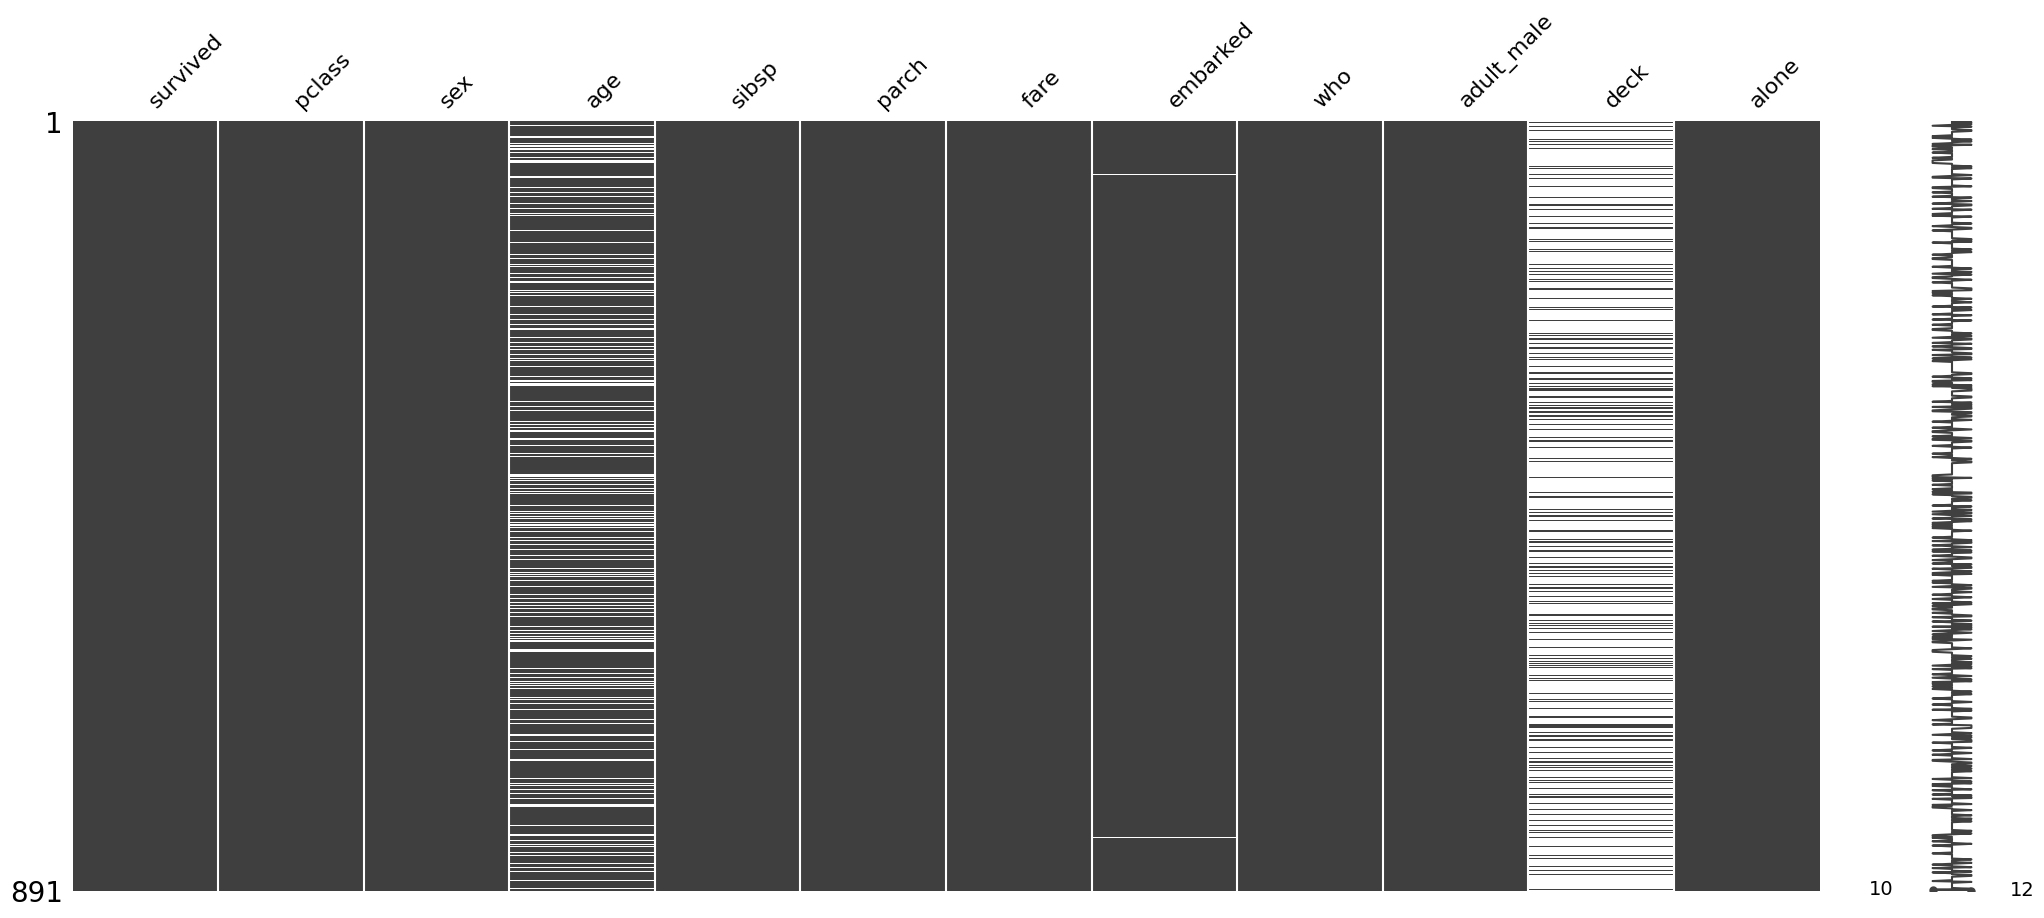

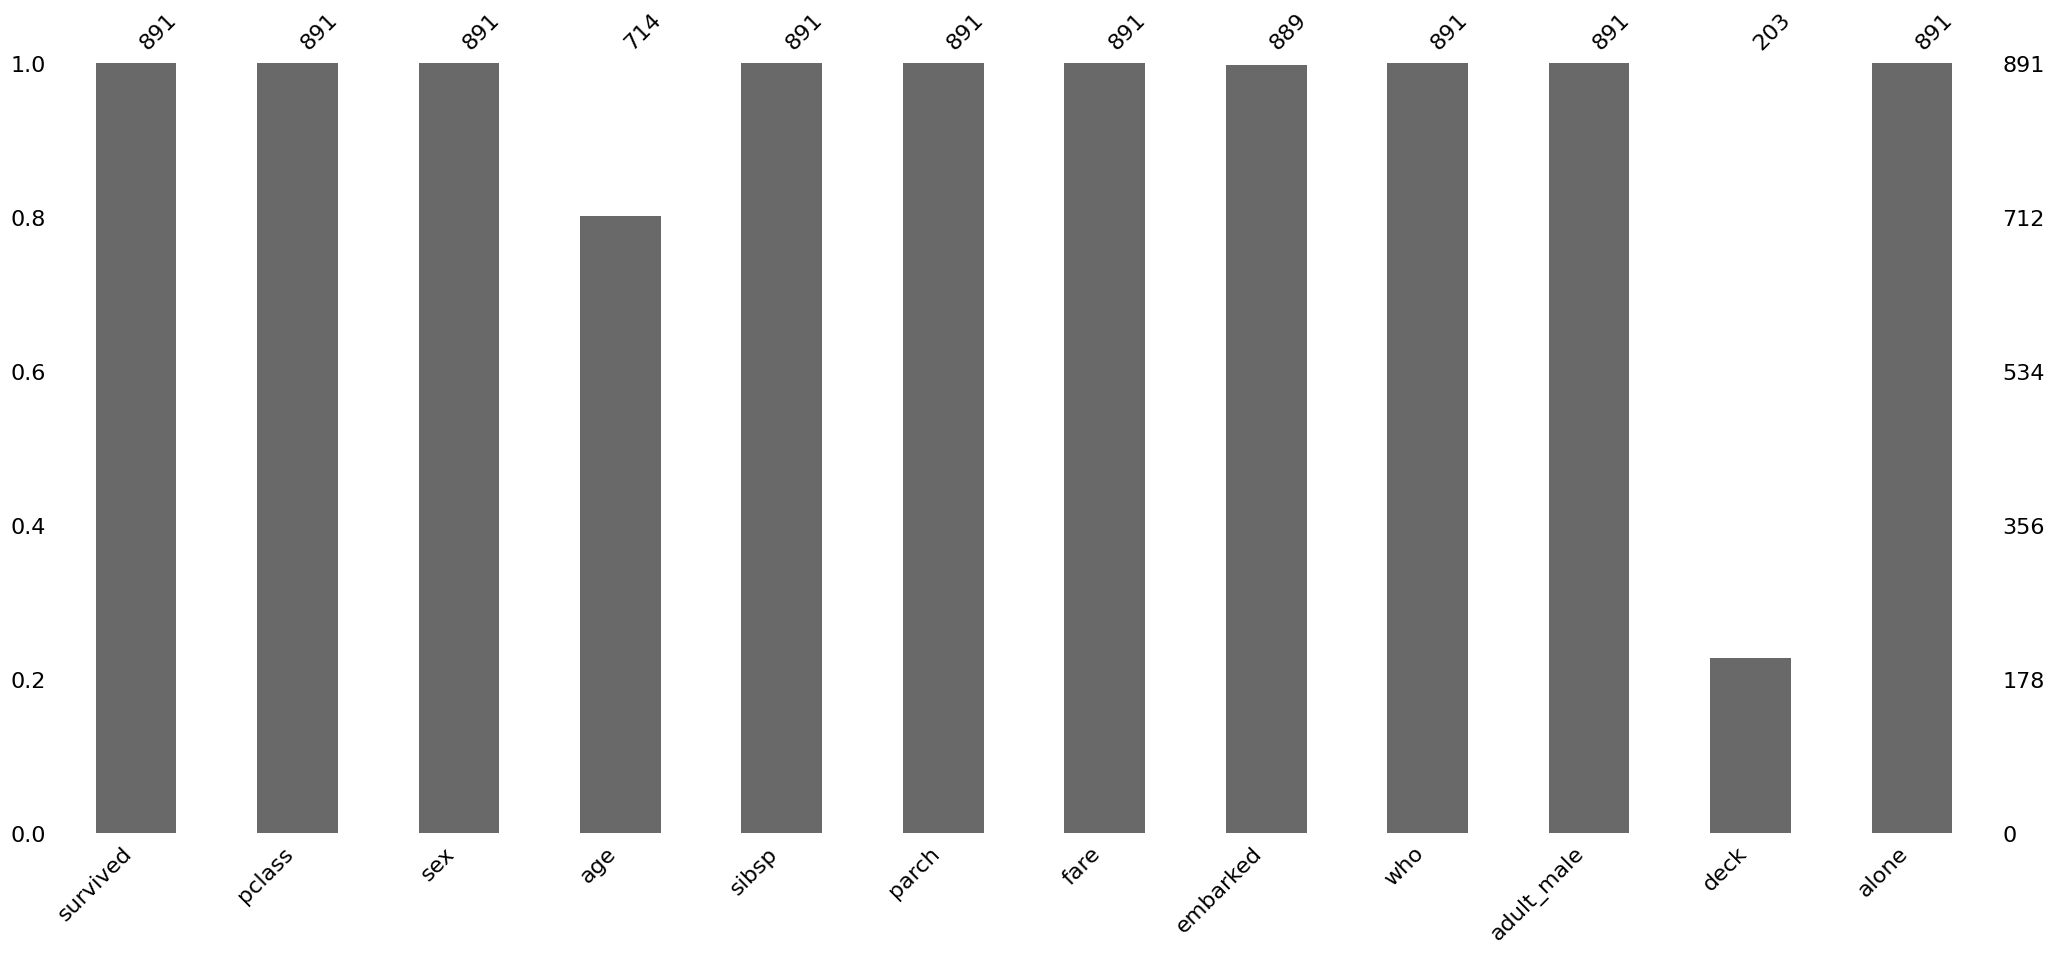

In [ ]:
import missingno as msno

# Visualize missing data using missingno
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

### Insights:
- The 'age' and 'deck' columns have a significant number of missing values.
- 'embarked' has a couple of missing values
- We'll need to decide how to handle these NaNs before proceeding with modeling. The 'deck' column may have too many missing values to be useful without significant imputation.

In [ ]:
# remove deck column (not enough info here)
df.drop(['deck'],axis=1,inplace=True)

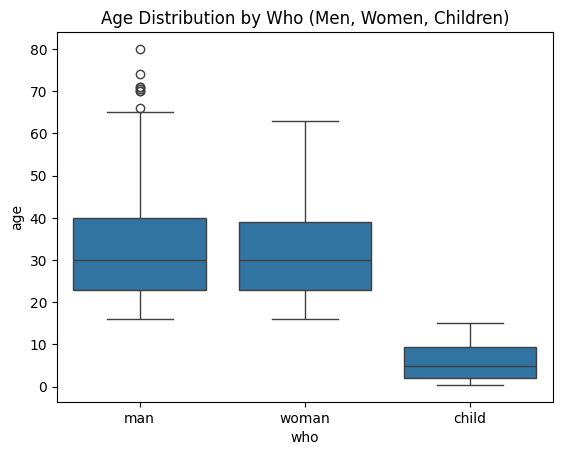

In [ ]:
# Let's explore the relationship between 'who' and 'age' to see if we can use 'who' for imputing missing ages
sns.boxplot(x='who', y='age', data=df)
plt.title("Age Distribution by Who (Men, Women, Children)")
plt.show()

### Insights:
- The 'age' column has many missing values, and visualizing the missing data shows that age is a significant feature with gaps. We need to address this issue to avoid biasing the model.
- By plotting 'age' against 'who', we see distinct distributions: children tend to be younger, while men and women have overlapping but distinct age ranges.
- A potential strategy is to impute missing age values based on the 'who' category, filling in likely ages for children, women, and men based on these distributions.
- This could provide a more accurate imputation than using the overall mean or median, especially in the case of children who are expected to have significantly lower ages.


### Remove NaNs
Imputing age could be a good stratgey here. For simplicity, we will just remove the rows where age has any NaNs, but keep in mind that this effectively tosses out ~20% of the data/information we have. In a real-world scenario, imputing is worth testing out.


In [ ]:
# Drop all rows containing NaN values
print(df.shape)
df_clean = df.dropna()
df_clean.shape

(891, 11)


(712, 11)

In [ ]:
# Count the number of NaN values in each column
print("Number of NaNs per column:")
print(df_clean.isna().sum())

Number of NaNs per column:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64


## Step 4: Identifying Outliers (Across Multiple Features)
Outliers can distort model performance and influence the relationships between features. We will use boxplots to identify outliers across multiple numerical columns, including 'age', 'fare', 'sibsp', and 'parch'.

### Why Look for Outliers?
- **Age**: Extreme values (e.g., very young or old passengers) might influence survival predictions.
- **Fare**: We've already identified skewness in the fare data, and high fares could represent wealthy individuals who had better chances of survival.


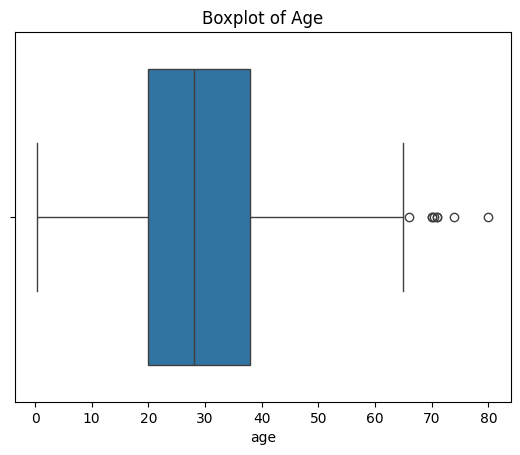

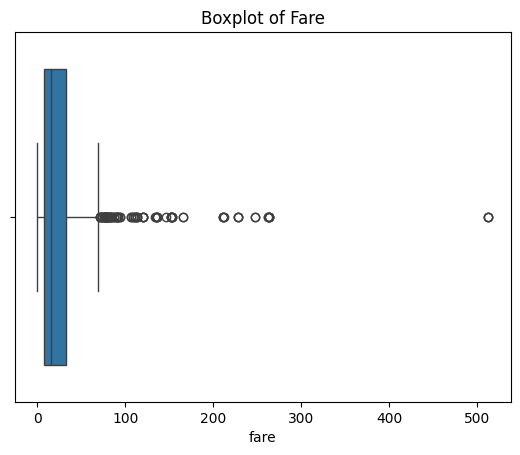

In [ ]:
import seaborn as sns
# Create boxplots for multiple numerical features to check for outliers
numerical_cols = ['age', 'fare']

for col in numerical_cols:
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot of {col.capitalize()}")
    plt.show()


### Insights:
- **Age**: Most passengers fall within a reasonable range, but there are a few extreme values for older passengers. These could be outliers that might need special attention during modeling.
- **Fare**: The boxplot confirms the presence of outliers, with several passengers paying significantly more than the majority.

## Step 5.1: Probability Density Plot for Fare
In addition to the boxplot for identifying outliers, we can draw a probability density plot (PDF) to visualize the overall distribution of the 'fare' column.

This plot will show the likelihood of different fare values occurring, highlighting any skewness or concentration of values in certain ranges.


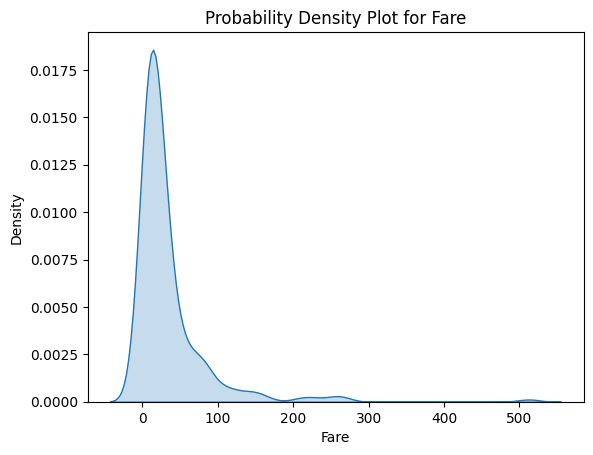

In [ ]:
# Plot the probability density plot (PDF) for fare
sns.kdeplot(df_clean['fare'].dropna(), fill=True)
plt.title("Probability Density Plot for Fare")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()


### Insights:
- The PDF for the fare column shows a strong right skew, with most passengers paying lower fares, but a few passengers paying significantly higher fares.
- This confirms the presence of outliers at the higher end, which we also observed in the boxplot.
- The density plot helps visualize how fares are concentrated in lower ranges and taper off gradually toward the higher end.


## Step 5.2: Log Scaling for Fare
To deal with the strong skewness and outliers in the 'fare' column, we can apply a log transformation. This will compress the range of the fare values, reducing the influence of extreme outliers while keeping the relative differences intact.

Log scaling is particularly useful for highly skewed distributions, making them more normal-like and easier for models to handle.


<ipython-input-17-9a2207254647>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'log_fare'] = df_clean['fare'].apply(lambda x: np.log(x + 1))


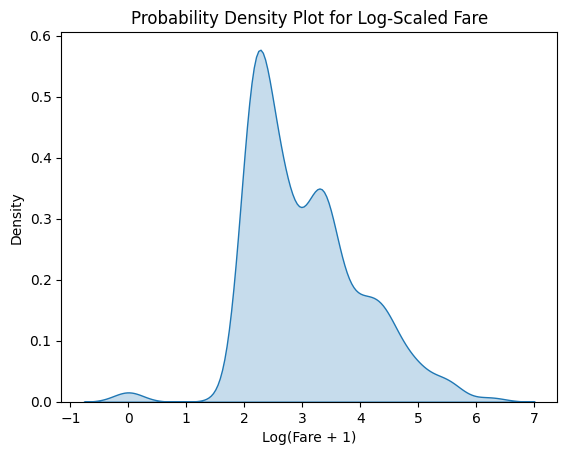

In [ ]:
import numpy as np
# Apply log scaling to the fare column (adding 1 to avoid log(0))
df_clean.loc[:, 'log_fare'] = df_clean['fare'].apply(lambda x: np.log(x + 1))

# Plot the PDF for the log-transformed fare column
sns.kdeplot(df_clean['log_fare'].dropna(), fill=True)
plt.title("Probability Density Plot for Log-Scaled Fare")
plt.xlabel("Log(Fare + 1)")
plt.ylabel("Density")
plt.show()

## Step 6: Exploring Correlations
Next, we'll check for correlations between numerical features. This helps us see whether some features are strongly related and could introduce multicollinearity.

For example:
- Correlations close to 1 or -1 indicate a strong relationship between features.
- Correlations close to 0 indicate little to no linear relationship between features.



## Step 6.1: Encode categoriecal data as numeric
Encoding the categorical data will allow us to measure correlations across different levels of our categorical variables. Encoded data is also needed for the modeling step. After encoding, you may want to visit some of the previous steps in this notebook to ensure there aren't any problems with the encoded version of the data. Some people like to encode right after loading their data, but this can make the data unnecessarily complicated while we do some basic browsing of the data (e.g., check for redundnat columns, check for NaNs, check data types, etc.)

Code explanation:

* pd.get_dummies(df, drop_first=True): This one-hot encodes all categorical columns, converting them into binary columns. The drop_first=True argument prevents multicollinearity by removing one of the categories in each column (since they are mutually exclusive).


In [ ]:
# One-hot encode the categorical columns in the dataset
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True,True,False


Code explanation.

* corr_matrix_encoded = df_encoded.corr(): This computes the correlation matrix for both the numerical and newly one-hot encoded features.
* Seaborn heatmap: The heatmap will visualize correlations across all features, both numerical and categorical (now encoded).

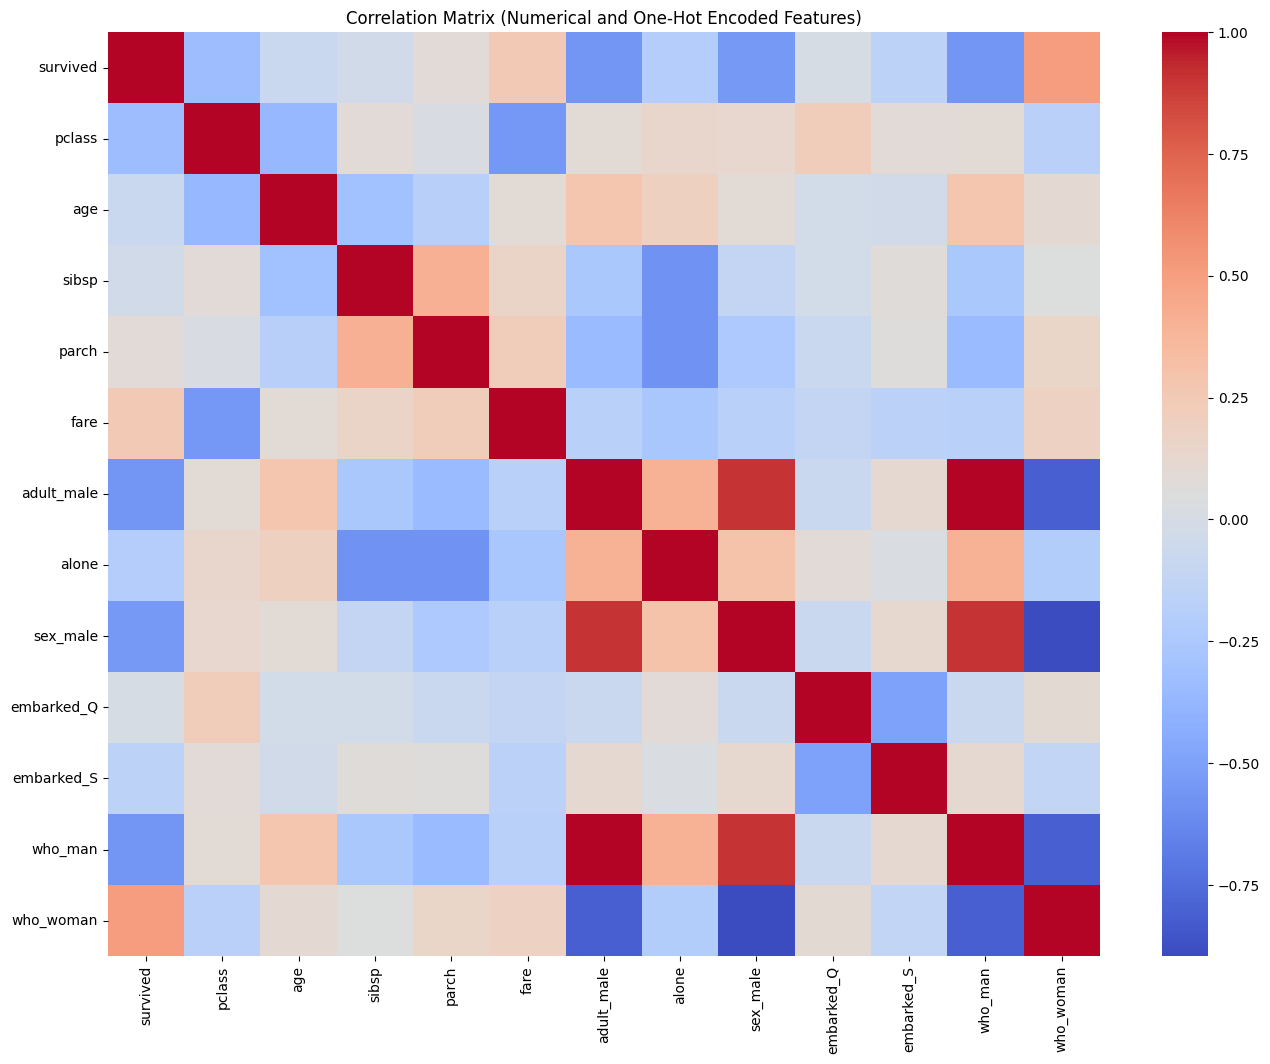

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367,-0.543351,0.003650,-0.155660,-0.557080,0.506562
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207,0.131900,0.221009,0.081720,0.094035,-0.177049
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270,0.093254,-0.022405,-0.032523,0.280328,0.105081
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.114631,-0.026354,0.070941,-0.253586,0.047071
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.245489,-0.081228,0.063036,-0.349943,0.150167
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832,-0.182333,-0.117216,-0.166603,-0.182024,0.191243
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.908578,-0.076789,0.112035,1.000000,-0.814281
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.303646,0.086464,0.024929,0.404744,-0.211036
sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.908578,0.303646,1.000000,-0.074115,0.125722,0.908578,-0.896214
embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.076789,0.086464,-0.074115,1.000000,-0.496624,-0.076789,0.100544


In [ ]:
# Calculate the correlation matrix for all features (including one-hot encoded)
corr_matrix_encoded = df_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_encoded, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical and One-Hot Encoded Features)")
plt.show()
corr_matrix_encoded

### Insights:
- There is a strong correlation between 'fare' and 'pclass', which makes sense since higher-class tickets typically have higher fares.
- 'SibSp' and 'Parch' have a weak positive correlation, indicating that larger families might be traveling together.
- There aren’t many strong correlations with 'survived', suggesting that more advanced feature engineering might be needed to improve model performance.
- who_man and adult_male are 100% correlated. We can remove one of these columns.

**Pro-tip**: The variance-inflation factor score can also be very helpful for assessing correlation. This measure looks at how well you can predict a given predictor (y) using all other predictors (X) as input variables to a linear regression model. The nice thing about it is that it gives you a different score for each predictor, which can be helpful when deciding which problematic features to remove.

In [ ]:
df_encoded.drop('who_man',axis=1,inplace=True)

## Step 6.1: Pairplot for Visualizing Pairwise Relationships
We’ll use Seaborn's pairplot to visualize pairwise relationships between the numerical features, colored by whether the passenger survived.

This can help us identify any patterns or clusters that may inform our modeling decisions.


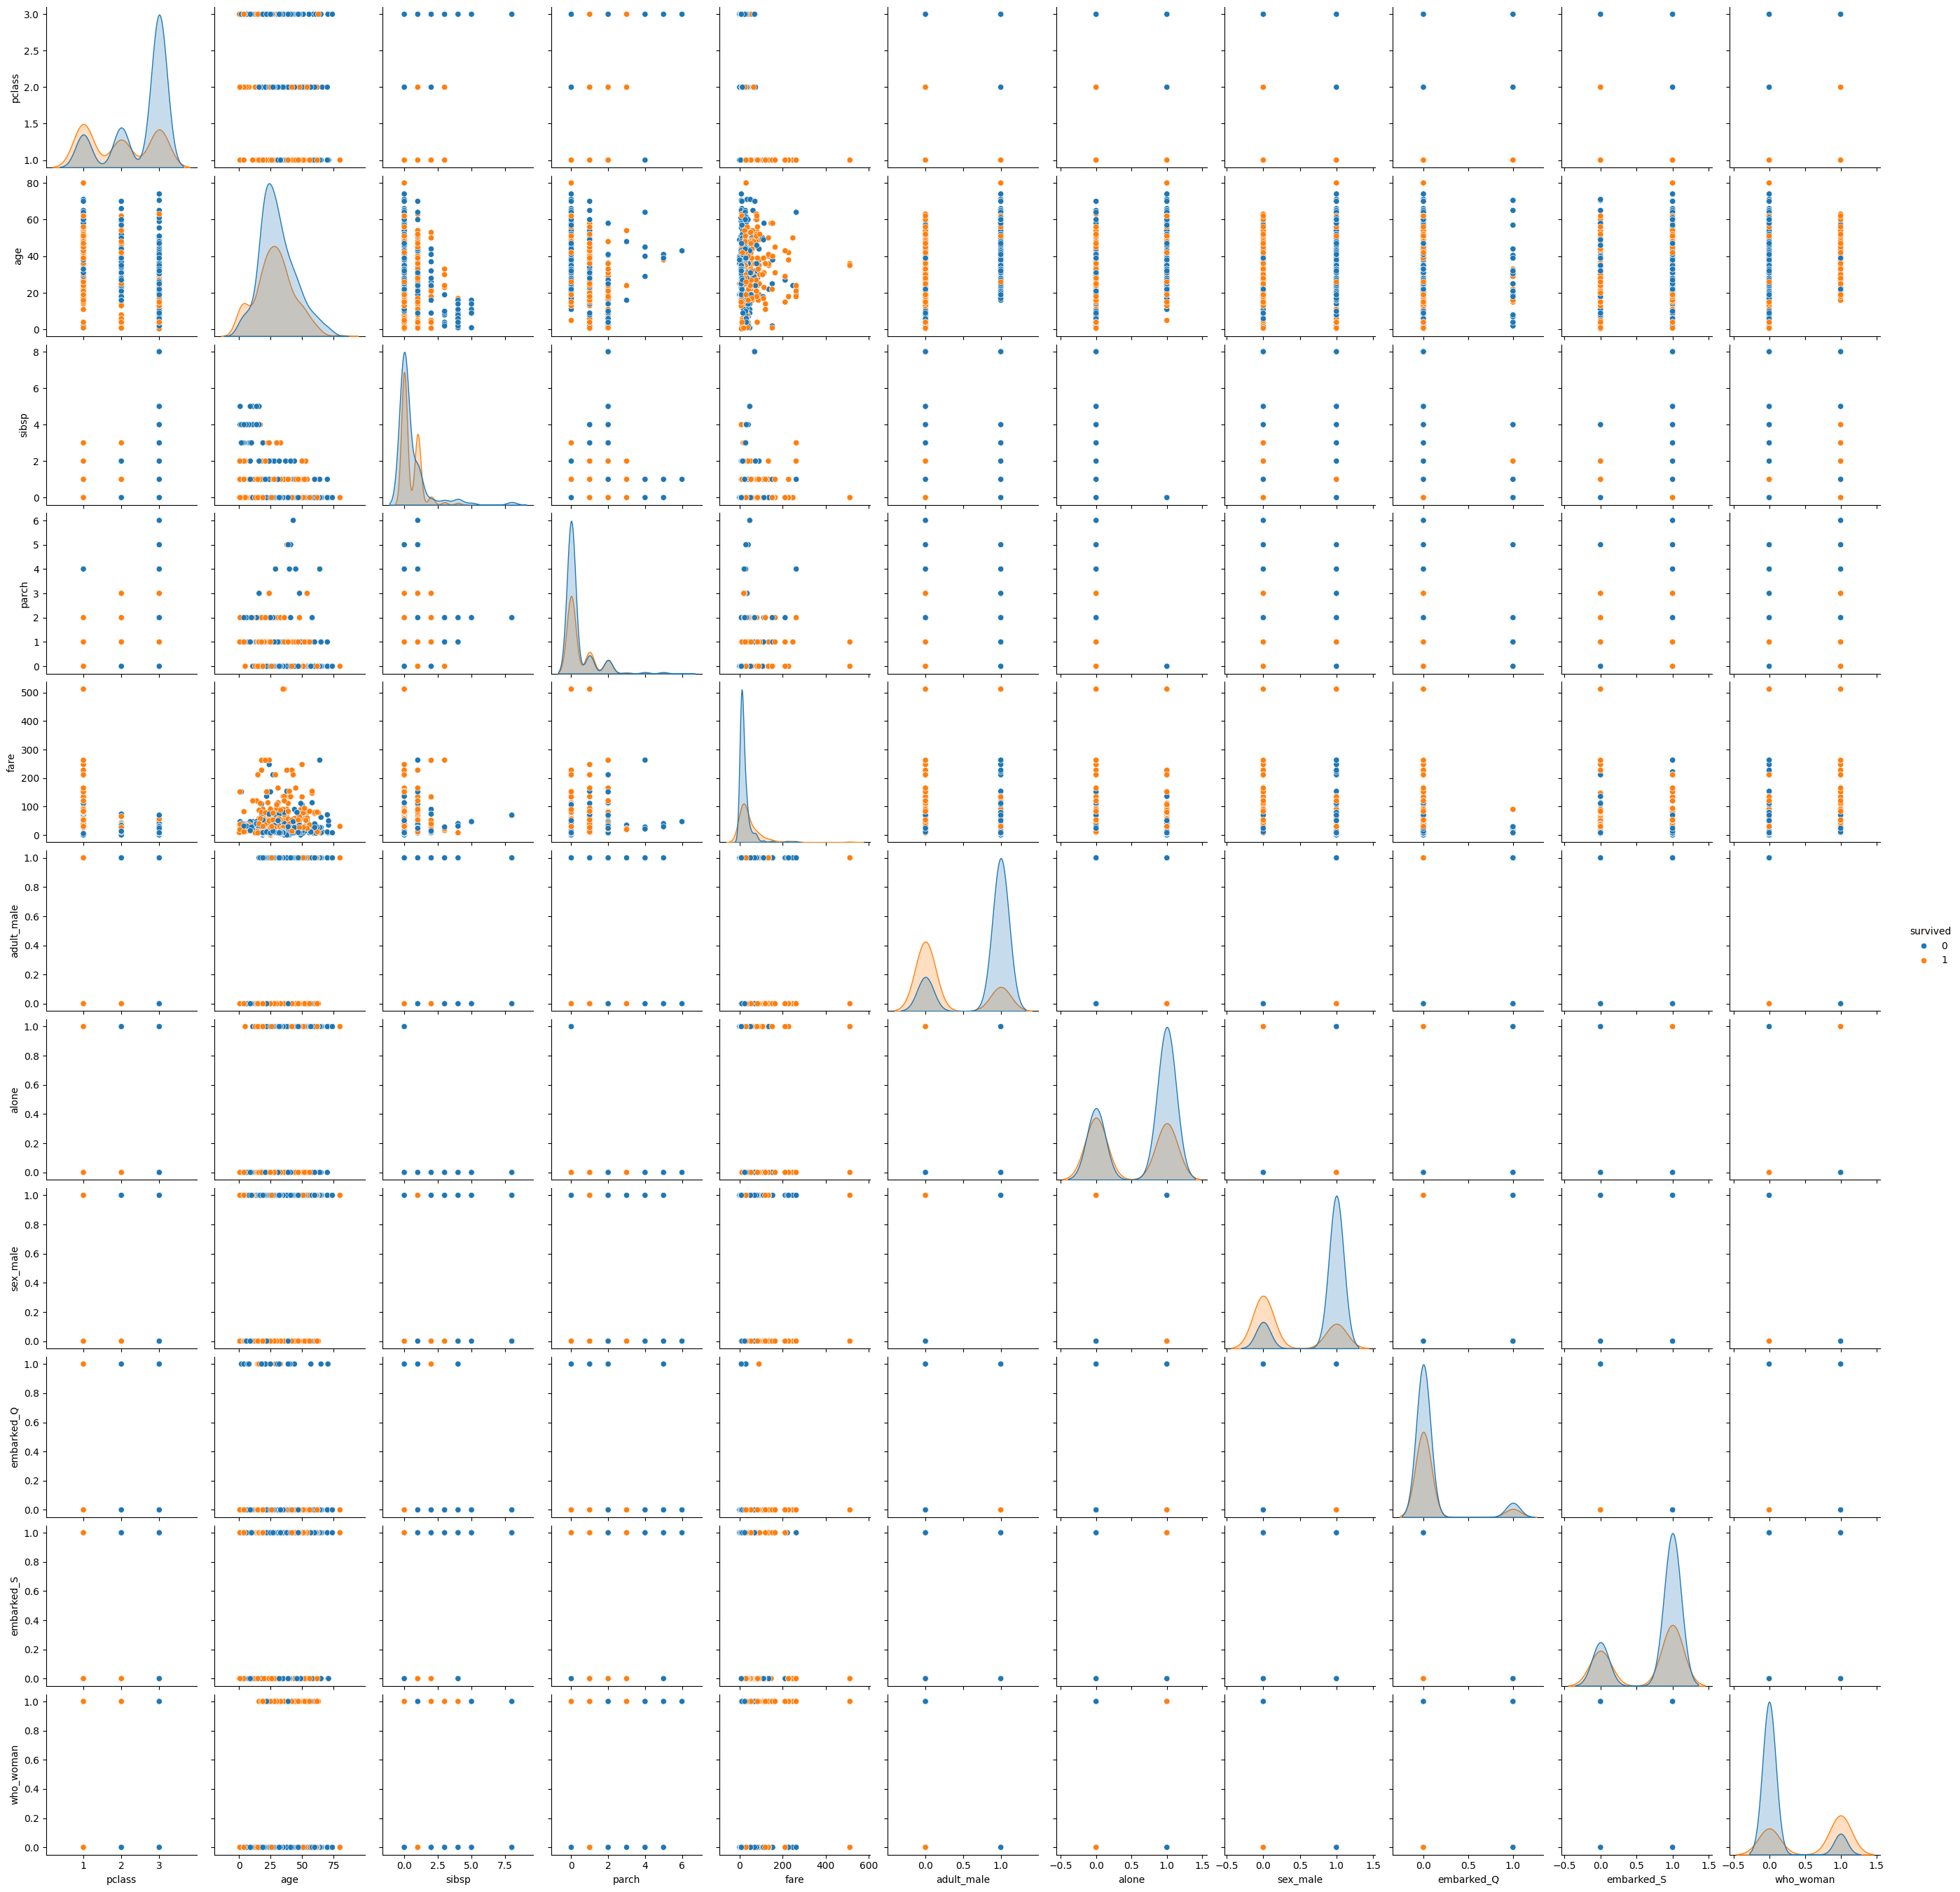

In [ ]:
# Pairplot to explore relationships between features, colored by 'survived'
sns.pairplot(df_encoded, hue='survived', diag_kind='kde')
plt.show()


### Insights:
- The pairplot shows some separation between survivors and non-survivors for certain features, such as 'pclass' and 'adult_male'
- The pairwise relationships between 'age', 'fare', and other numerical features are not perfectly linear, suggesting that non-linear models might perform better.
- Visualizing these relationships helps in identifying where additional feature engineering may be required to boost model performance.


## Conclusion: Next Steps for Modeling and Iterative EDA

Now that we've explored the Titanic dataset through extensive EDA, we've gained valuable insights that can guide our next steps in the modeling process. However, it's important to remember that EDA is not a one-time process—it's iterative and should continue as new patterns or issues arise during modeling.

### Key Takeaways:
1. **Feature Engineering**:
   - We've identified that the 'fare' and 'pclass' columns are strongly correlated, suggesting that we might combine or transform these features for better model performance.
   - Log scaling 'fare' has helped reduce skewness, making this feature more suitable for modeling. We can apply similar transformations to other skewed features as necessary.
   - Features like 'who' and 'age' might benefit from imputation or interaction terms to capture deeper relationships with survival outcomes.

2. **Handling Missing Data**:
   - 'Age' and 'deck' have substantial missing values. Imputing missing values based on insights from other features (e.g., using 'who' to impute 'age') could improve model robustness. Alternatively, we could explore more advanced techniques like multiple imputation or train models that handle missing data natively.
   
3. **Addressing Outliers**:
   - The high outliers in 'fare' present a potential challenge for models like linear regression. In addition to log scaling, other techniques such as robust models or trimming/capping the extreme values could be useful.

4. **Model Selection**:
   - With weak correlations between 'survived' and other numerical features, we may need to consider more complex, non-linear models like random forests, gradient boosting, or even deep learning methods that can capture non-linear patterns and interactions.
   - The insights from the pairplot suggest that non-linear relationships might exist between certain features, making tree-based models or ensemble methods a promising direction.

5. **Iterative EDA**:
   - EDA doesn't end here. As we start building models, we may encounter unexpected patterns or issues (e.g., poor model performance on certain subgroups, overfitting due to outliers). This will prompt us to revisit the EDA, iterating on feature engineering, transforming variables, or handling missing data more effectively.
   - Evaluating model performance through techniques like cross-validation will provide additional insights, leading to further refinements in both data preprocessing and feature selection.

### Inspirational Next Steps:
- **Begin Modeling**: Start by testing simple models (e.g., logistic regression) with the current feature set to get a baseline understanding of model performance. Use these models as a foundation for experimenting with more advanced methods.
- **Keep Exploring**: Stay curious and open to revisiting your EDA. As you iterate through feature engineering and model development, new questions will arise that could lead to even deeper insights.
- **Experiment**: Try different combinations of features, scaling techniques, and models. Use the insights from the EDA to inform these decisions but be prepared to experiment and validate your assumptions.
- **Iterate and Improve**: Each iteration of modeling and EDA will bring you closer to a robust solution. Keep refining your approach as new patterns emerge and as your understanding of the dataset deepens.

Remember, successful data science projects are not linear—they involve constant refinement, exploration, and learning. Keep iterating, keep questioning, and keep improving!

Good luck on your journey from EDA to building powerful predictive models!
